## Generate Summary Statistics for Sacramento County

Begin by importing all python modules we will need.

In [1]:
# A 'magic' command to display plots inline
%matplotlib inline

import requests
import pandas as pd
from datetime import datetime
import itertools
import calendar
import seaborn as sns
sns.set()

### 1. Get projections

The code in the next cell contains a function to:
    - fetch annual averages of Max. Temp, Min. Temp and Precipitation for 4 GCMs and 2 scenarios for Sacramento County from the API
    - return a new dataframe that contains all the data
    
Just run the cell, you can go over the code at your leisure.

In [2]:
baseurl = 'https://api.cal-adapt.org/api/series/%s/events/'
  
def fetch_events(*args):
    items = itertools.product(*args)
    params = {'stat': 'mean', 'ref': '/api/counties/34/', 'imperial': True}
    series = []
    for parts in items:
        slug = '_'.join(parts)
        print('Processing:', slug)
        response = requests.get(baseurl % slug, params=params)
        ser = pd.read_json(response.text, typ='series', orient='split')
        # Excel output later cannot handle timezones so remove it.
        ser.index = ser.index.tz_convert(None)
        series.append(ser)
    return pd.concat(series, axis=1)

Execute the `fetch_events()` function. If all goes well, you should see a list of messages as the code process each timeseries.

In [3]:
climvars = ['tasmax', 'tasmin', 'pr']
periods = ['year']
models = ['CanESM2', 'CNRM-CM5', 'HadGEM2-ES', 'MIROC5']
scenarios = ['rcp45', 'rcp85']
projections = fetch_events(climvars, periods, models, scenarios)

Processing: tasmax_year_CanESM2_rcp45
Processing: tasmax_year_CanESM2_rcp85
Processing: tasmax_year_CNRM-CM5_rcp45
Processing: tasmax_year_CNRM-CM5_rcp85
Processing: tasmax_year_HadGEM2-ES_rcp45
Processing: tasmax_year_HadGEM2-ES_rcp85
Processing: tasmax_year_MIROC5_rcp45
Processing: tasmax_year_MIROC5_rcp85
Processing: tasmin_year_CanESM2_rcp45
Processing: tasmin_year_CanESM2_rcp85
Processing: tasmin_year_CNRM-CM5_rcp45
Processing: tasmin_year_CNRM-CM5_rcp85
Processing: tasmin_year_HadGEM2-ES_rcp45
Processing: tasmin_year_HadGEM2-ES_rcp85
Processing: tasmin_year_MIROC5_rcp45
Processing: tasmin_year_MIROC5_rcp85
Processing: pr_year_CanESM2_rcp45
Processing: pr_year_CanESM2_rcp85
Processing: pr_year_CNRM-CM5_rcp45
Processing: pr_year_CNRM-CM5_rcp85
Processing: pr_year_HadGEM2-ES_rcp45
Processing: pr_year_HadGEM2-ES_rcp85
Processing: pr_year_MIROC5_rcp45
Processing: pr_year_MIROC5_rcp85


Explore the `projections` dataframe.

In [39]:
projections.head()

,tasmax_year_CanESM2_rcp45,tasmax_year_CanESM2_rcp85,tasmax_year_CNRM-CM5_rcp45,tasmax_year_CNRM-CM5_rcp85,tasmax_year_HadGEM2-ES_rcp45,tasmax_year_HadGEM2-ES_rcp85,tasmax_year_MIROC5_rcp45,tasmax_year_MIROC5_rcp85,tasmin_year_CanESM2_rcp45,tasmin_year_CanESM2_rcp85,...,tasmin_year_MIROC5_rcp45,tasmin_year_MIROC5_rcp85,pr_year_CanESM2_rcp45,pr_year_CanESM2_rcp85,pr_year_CNRM-CM5_rcp45,pr_year_CNRM-CM5_rcp85,pr_year_HadGEM2-ES_rcp45,pr_year_HadGEM2-ES_rcp85,pr_year_MIROC5_rcp45,pr_year_MIROC5_rcp85
2006-12-31,74.747910,75.107658,76.647614,75.399017,77.219780,74.931107,76.082367,75.838364,50.248016,50.439400,...,49.129166,49.957535,0.046706,0.041527,0.031997,0.044459,0.032393,0.023838,0.028299,0.053980
2007-12-31,76.200302,77.076294,76.533958,76.712540,77.385345,78.054192,78.304626,76.472656,49.100658,49.230186,...,50.450054,49.310497,0.029080,0.031181,0.047806,0.048062,0.056618,0.022522,0.031704,0.031224
2008-12-31,76.358292,75.131943,76.584930,76.810654,75.870384,75.509369,77.257629,75.483612,50.752945,50.159409,...,49.504681,49.546371,0.054170,0.064152,0.084960,0.031453,0.035054,0.038045,0.040268,0.053236
2009-12-31,76.196289,77.721741,75.182312,77.260376,75.439285,75.518158,75.292999,74.562897,50.738609,52.298836,...,50.942078,50.052624,0.076171,0.060180,0.052913,0.036320,0.056580,0.055141,0.087593,0.067037
2010-12-31,77.245102,76.099174,78.011505,76.424698,76.534836,74.212547,74.874359,75.523651,50.407646,51.237499,...,50.448406,50.371063,0.041859,0.072307,0.031882,0.072720,0.034661,0.086447,0.062782,0.057395


### 2. Get historical observed data

The code in the next cell will:
    - fetch annual averages of Max. Temp, Min. Temp and Precipitation for the livneh data for Sacramento County from the API
    - return a new dataframe that contains all the data

Execute the `fetch_events()` function. If all goes well, you should see a list of messages as the code process each timeseries

In [4]:
observed = fetch_events(climvars, periods, ('livneh',))

Processing: tasmax_year_livneh
Processing: tasmin_year_livneh
Processing: pr_year_livneh


Explore the observed dataframe

In [41]:
observed.tail()

,tasmax_year_livneh,tasmin_year_livneh,pr_year_livneh
2009-12-31,75.264885,49.280743,0.049633
2010-12-31,73.337845,49.839211,0.070256
2011-12-31,73.517212,48.465778,0.055020
2012-12-31,75.633453,49.621216,0.066528
2013-12-31,76.311295,48.722893,0.017117


### 3. Summary stats

Generate summary stats for baseline period 1961-1990

In [115]:
baseline = observed['1961':'1990']
baseline.describe().T

,count,mean,std,min,25%,50%,75%,max
tasmax_year_livneh,30.0,73.973449,1.290351,71.150162,73.251253,73.860184,74.685411,76.470787
tasmin_year_livneh,30.0,48.430967,1.007115,46.506229,47.737072,48.370823,48.984287,50.591961
pr_year_livneh,30.0,0.050155,0.018030,0.018493,0.037044,0.045868,0.058768,0.103012


Generate summary stats for 2020-2050

In [116]:
p2020_2050 = projections['2020':'2050']
p2020_2050.agg(['mean', 'max', 'min', 'std']).T

,mean,max,min,std
tasmax_year_CanESM2_rcp45,78.129031,79.851059,76.181412,0.835364
tasmax_year_CanESM2_rcp85,78.773200,80.561218,76.184265,1.104418
tasmax_year_CNRM-CM5_rcp45,76.849601,78.865143,74.052261,1.192972
tasmax_year_CNRM-CM5_rcp85,77.078877,79.620346,75.214386,1.175390
tasmax_year_HadGEM2-ES_rcp45,77.641000,79.852104,75.115234,1.259808
tasmax_year_HadGEM2-ES_rcp85,78.275989,80.591873,76.212112,1.117053
tasmax_year_MIROC5_rcp45,77.139956,79.546410,73.974854,1.523833
tasmax_year_MIROC5_rcp85,77.708849,80.975128,74.777794,1.511135
tasmin_year_CanESM2_rcp45,52.330300,55.087219,50.238567,1.106438
tasmin_year_CanESM2_rcp85,52.906285,55.841156,50.476639,1.442695


In [117]:
p2070_2099 = projections['2070':'2099']
p2070_2099.agg(['mean', 'max', 'min', 'std']).T

,mean,max,min,std
tasmax_year_CanESM2_rcp45,80.033875,81.889191,78.369659,0.877728
tasmax_year_CanESM2_rcp85,83.861667,87.184105,81.198044,1.514878
tasmax_year_CNRM-CM5_rcp45,79.012467,80.682671,77.611938,0.891429
tasmax_year_CNRM-CM5_rcp85,81.845954,83.841843,78.672836,1.194800
tasmax_year_HadGEM2-ES_rcp45,80.377329,83.678314,77.126068,1.524537
tasmax_year_HadGEM2-ES_rcp85,83.740111,85.858109,81.668259,1.106407
tasmax_year_MIROC5_rcp45,79.644800,82.101944,77.110191,1.355537
tasmax_year_MIROC5_rcp85,81.314671,84.295799,77.984650,1.604134
tasmin_year_CanESM2_rcp45,54.106755,56.100159,51.024750,1.216742
tasmin_year_CanESM2_rcp85,58.431740,61.911926,54.059944,1.842262


Calculate difference from baseline values for Tasmax and get quantiles

In [118]:
# Subtract baseline period mean from all values
tmax_change = p2070_2099.filter(like='tasmax') - baseline.filter(like='tasmax').mean()[0]
tmax_quantiles = tmax_change.quantile([.1, .25, .75, .90]).T
tmax_quantiles

,0.10,0.25,0.75,0.90
tasmax_year_CanESM2_rcp45,4.732582,5.633443,6.501020,7.014891
tasmax_year_CanESM2_rcp85,7.398591,8.881356,11.001481,11.379670
tasmax_year_CNRM-CM5_rcp45,3.910879,4.180018,5.677918,6.101319
tasmax_year_CNRM-CM5_rcp85,6.468241,7.025916,8.805177,9.299228
tasmax_year_HadGEM2-ES_rcp45,4.233856,5.424234,7.117736,8.072132
tasmax_year_HadGEM2-ES_rcp85,8.252253,9.198329,10.176244,11.400214
tasmax_year_MIROC5_rcp45,3.854396,4.753341,6.636949,7.428166
tasmax_year_MIROC5_rcp85,5.703639,6.288888,8.072324,9.954664


### 4. Export to Excel

In [51]:
with pd.ExcelWriter('output.xlsx', datetime_format='YYYY-MM-DD') as writer:
    baseline.to_excel(writer, 'Baseline')
    p2020_2050.to_excel(writer, '2020-2050')
    p2070_2099.to_excel(writer, '2070-2099')

In [48]:
tmax_quantiles.to_csv('tmax.csv')

### 5. Make charts

Create a linechart showing all timeseries for Max. Temperature and RCP 4.5. Export it to a png file.

,tasmax_year_CanESM2_rcp45,tasmax_year_CNRM-CM5_rcp45,tasmax_year_HadGEM2-ES_rcp45,tasmax_year_MIROC5_rcp45
event,,,,
2006-12-31,74.747910,76.647614,77.219780,76.082367
2007-12-31,76.200302,76.533958,77.385345,78.304626
2008-12-31,76.358292,76.584930,75.870384,77.257629
2009-12-31,76.196289,75.182312,75.439285,75.292999
2010-12-31,77.245102,78.011505,76.534836,74.874359


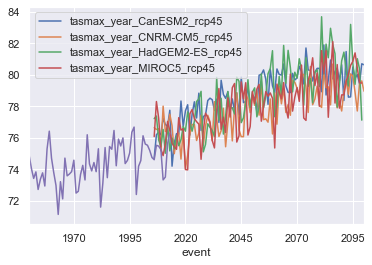

In [119]:
tmax_rcp45 = projections.filter(regex='tasmax.*rcp45')
plot = tmax_rcp45.plot()
observed['tasmax_year_livneh'].plot()
fig = plot.get_figure()
fig.savefig('output.png')
tmax_rcp45.head()

Categorical [Scatterplots](https://seaborn.pydata.org/tutorial/categorical.html#categorical-scatterplots). We need to restructure the `DataFrame` from wide to long format for these plots.

In [120]:
combined = projections.join(observed, how='outer')
combined.index.name = 'event'
combined = combined.reset_index()
df = combined.melt(id_vars=['event'], value_vars=set(combined.columns) - {'event'}).dropna()
# Parse the variable name into individual columns.
meta = df.variable.str.replace('_year', '').str.split('_', expand=True)
meta.columns = ['climvar', 'model', 'scenario']
meta.loc[meta.scenario.isnull(),'scenario'] = 'historical'
df = df.drop(columns=['variable']).join(meta)
df.head()

,event,value,climvar,model,scenario
56,2006-12-31,0.041527,pr,CanESM2,rcp85
57,2007-12-31,0.031181,pr,CanESM2,rcp85
58,2008-12-31,0.064152,pr,CanESM2,rcp85
59,2009-12-31,0.060180,pr,CanESM2,rcp85
60,2010-12-31,0.072307,pr,CanESM2,rcp85


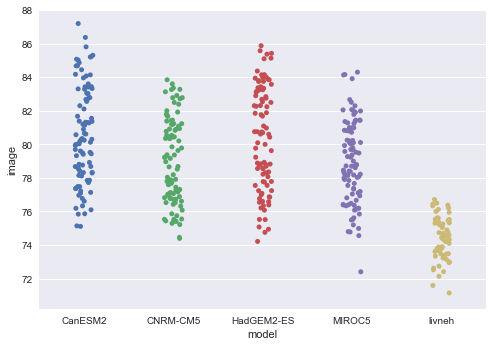

In [17]:
tmax85 = df[(df.climvar == 'tasmax') & (df.scenario != 'rcp45')]
ax = sns.stripplot(x='model', y='value', data=tmax85, jitter=True)

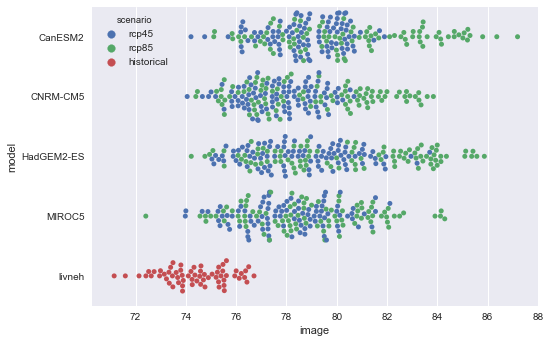

In [18]:
tasmax = df[df.climvar == 'tasmax']
sns.swarmplot(y='model', x='value', hue='scenario', data=tasmax)

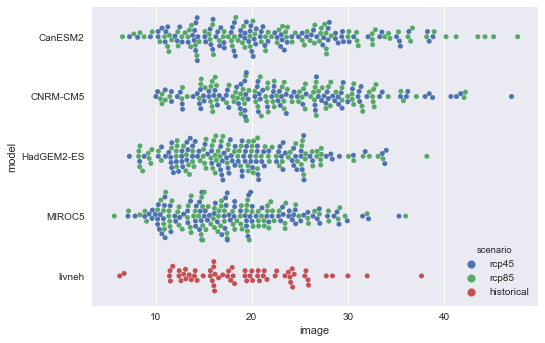

In [19]:
precip = df[df.climvar == 'pr']
sns.swarmplot(y='model', x='value', hue='scenario', data=precip)

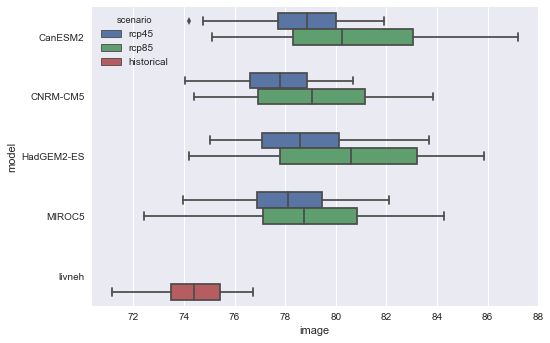

In [20]:
sns.boxplot(y='model', x='value', hue='scenario', data=tasmax)

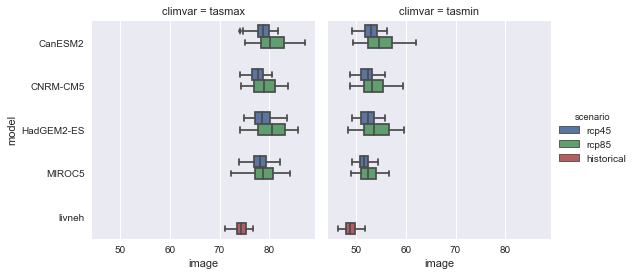

In [21]:
tas = df[df.climvar.isin(['tasmax', 'tasmin'])]
sns.factorplot(y='model', x='value', hue='scenario', kind='box', col='climvar', data=tas)